# Part 1 - Setup and Data Preparation
In this section, we will:
- Import necessary packages for this demonstration
- Load the data
- Ensure that qualitative predictor variables are of the *category* data type

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf

# Import methods for regression diagnostic plots from 'statsmodels'
from statsmodels.api import ProbPlot, qqplot

In [ ]:
# Data source
# link = 'https://archive.ics.uci.edu/dataset/10/automobile'

In [2]:
# Load the data and take a look at it
df = pd.read_csv('carprices.csv', index_col = 'car_ID')
df.head()

,symboling,carname,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Load the data description and take a look at it
dd = pd.read_csv('carpricesdatadescription.csv', index_col = 'feature')
dd

,description
feature,
car_ID,unique id of each observation (Integer)
symboling,risk rating (Categorical)
carcompany,name of car company (Categorical)
doornumber,number of doors in a car (Categorical)
carbody,body of car (Categorical)
enginelocation,location of car engine (Categorical)
wheelbase,wheelbase of car (Numeric)
carlength,length of car (Numeric)
carwidth,width of car (Numeric)


In [4]:
# Look at the specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   carname           205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   enginelocation    205 non-null    object 
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  cylindernumber    205 non-null    object 
 11  enginesize        205 non-null    int64  
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 17  ci

Most features in this dataset are numeric, being either of the *int64* datatype or the *float64* datatype, but some features are of the *object* datatype. These are, in fact, strings. Typically, when conducting categorical analysis, it is better to convert these into the *category* datatype.

In [5]:
# Convert qualitative predictors to the 'category' data type
categorical_columns = df.select_dtypes(include = 'object').columns
df[categorical_columns] = df[categorical_columns].astype('category')

In [6]:
# Look at the specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    int64   
 1   carname           205 non-null    category
 2   doornumber        205 non-null    category
 3   carbody           205 non-null    category
 4   enginelocation    205 non-null    category
 5   wheelbase         205 non-null    float64 
 6   carlength         205 non-null    float64 
 7   carwidth          205 non-null    float64 
 8   carheight         205 non-null    float64 
 9   curbweight        205 non-null    int64   
 10  cylindernumber    205 non-null    category
 11  enginesize        205 non-null    int64   
 12  boreratio         205 non-null    float64 
 13  stroke            205 non-null    float64 
 14  compressionratio  205 non-null    float64 
 15  horsepower        205 non-null    int64   
 16  peakrpm           205 non-null 

**Note:** The *object* datatype entries are now of the *category* datatype. This helps in conducting categorical analysis more efficiently.

It is important to note that the *symboling* feature has been recorded as an integer but it is actually a categorical variable. We can understand this from the data description.

In [7]:
# Convert the 'symboling' feature to the 'category' datatype
df['symboling'] = df['symboling'].astype('category')

In [8]:
# Drop the car name as it won't be useful in the overall analysis
df.drop(labels = 'carname', axis = 1, inplace = True)

**Note:** Names, identifiers, and so on, are generally not considered as valid predictor variables.

In [9]:
# Take a look at the data
df.head()

,symboling,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,
1,3,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# Check the shape and size of the data
df.shape

(205, 19)

**Note:** This is, of course, a small dataset. For this demonstration, we will use a subset of the features. Learners may explore with the original dataset at a later time.

In [11]:
# Retain a select number of columns for the purposes of this demonstration
df = df[['symboling',
         'carbody',
         'enginelocation',
         'carlength',
         'carwidth',
         'carheight',
         'curbweight',
         'horsepower',
         'citympg',
         'highwaympg',
         'price']]

In [12]:
# Take a look at the data
df.head()

,symboling,carbody,enginelocation,carlength,carwidth,carheight,curbweight,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,,
1,3,convertible,front,168.8,64.1,48.8,2548,111,21,27,13495.0
2,3,convertible,front,168.8,64.1,48.8,2548,111,21,27,16500.0
3,1,hatchback,front,171.2,65.5,52.4,2823,154,19,26,16500.0
4,2,sedan,front,176.6,66.2,54.3,2337,102,24,30,13950.0
5,2,sedan,front,176.6,66.4,54.3,2824,115,18,22,17450.0


In [13]:
# Check the shape and size of the data
df.shape

(205, 11)

In [14]:
# Look at the specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   symboling       205 non-null    category
 1   carbody         205 non-null    category
 2   enginelocation  205 non-null    category
 3   carlength       205 non-null    float64 
 4   carwidth        205 non-null    float64 
 5   carheight       205 non-null    float64 
 6   curbweight      205 non-null    int64   
 7   horsepower      205 non-null    int64   
 8   citympg         205 non-null    int64   
 9   highwaympg      205 non-null    int64   
 10  price           205 non-null    float64 
dtypes: category(3), float64(4), int64(4)
memory usage: 15.6 KB


In [15]:
# Store the categorical column names
categorical_columns = df.select_dtypes(include = 'category').columns

# Part 2 - Exploratory Data Analysis
In this section, we will conduct EDA on the dataset using various visualizations and pivot tables

## EDA: Visualizations

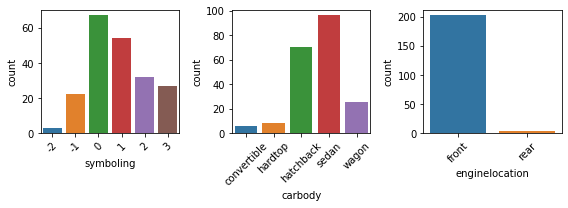

In [16]:
# Create count plots for the categorical variables
plt.figure(figsize = (8, 3))

fignum = 0
for featurename in categorical_columns:
    fignum = fignum + 1
    plt.subplot(1, 3, fignum)
    sns.countplot(data = df, x = featurename)
    plt.xticks(rotation = 45)

plt.tight_layout();

**Note:** Count plots are useful to get a sense of the distribution of occurence of the different levels of categorical variables in the data set.

We can see that the *enginelocation* feature is extremely imbalanced.

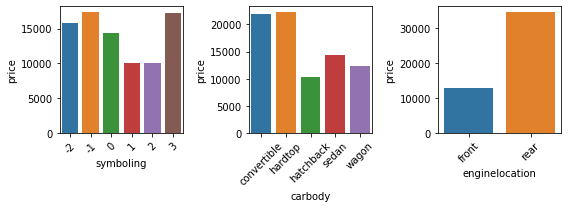

In [17]:
# Create bar plots for the categorical variables with 'price' on the Y-axis
plt.figure(figsize = (8, 3))

fignum = 0
for featurename in categorical_columns:
    fignum = fignum + 1
    plt.subplot(1, 3, fignum)
    sns.barplot(x = df[featurename], y = df['price'], ci = None)
    plt.xticks(rotation = 45)
    
plt.tight_layout();

The bar plots here help us compare the value of the *price* variable between different levels of categorical variables.

In [18]:
# Drop the engine location feature as there is very high class imbalance
df.drop(labels = 'enginelocation', axis = 1, inplace = True)

We're dropping the *enginelocation* feature due to its imbalance.

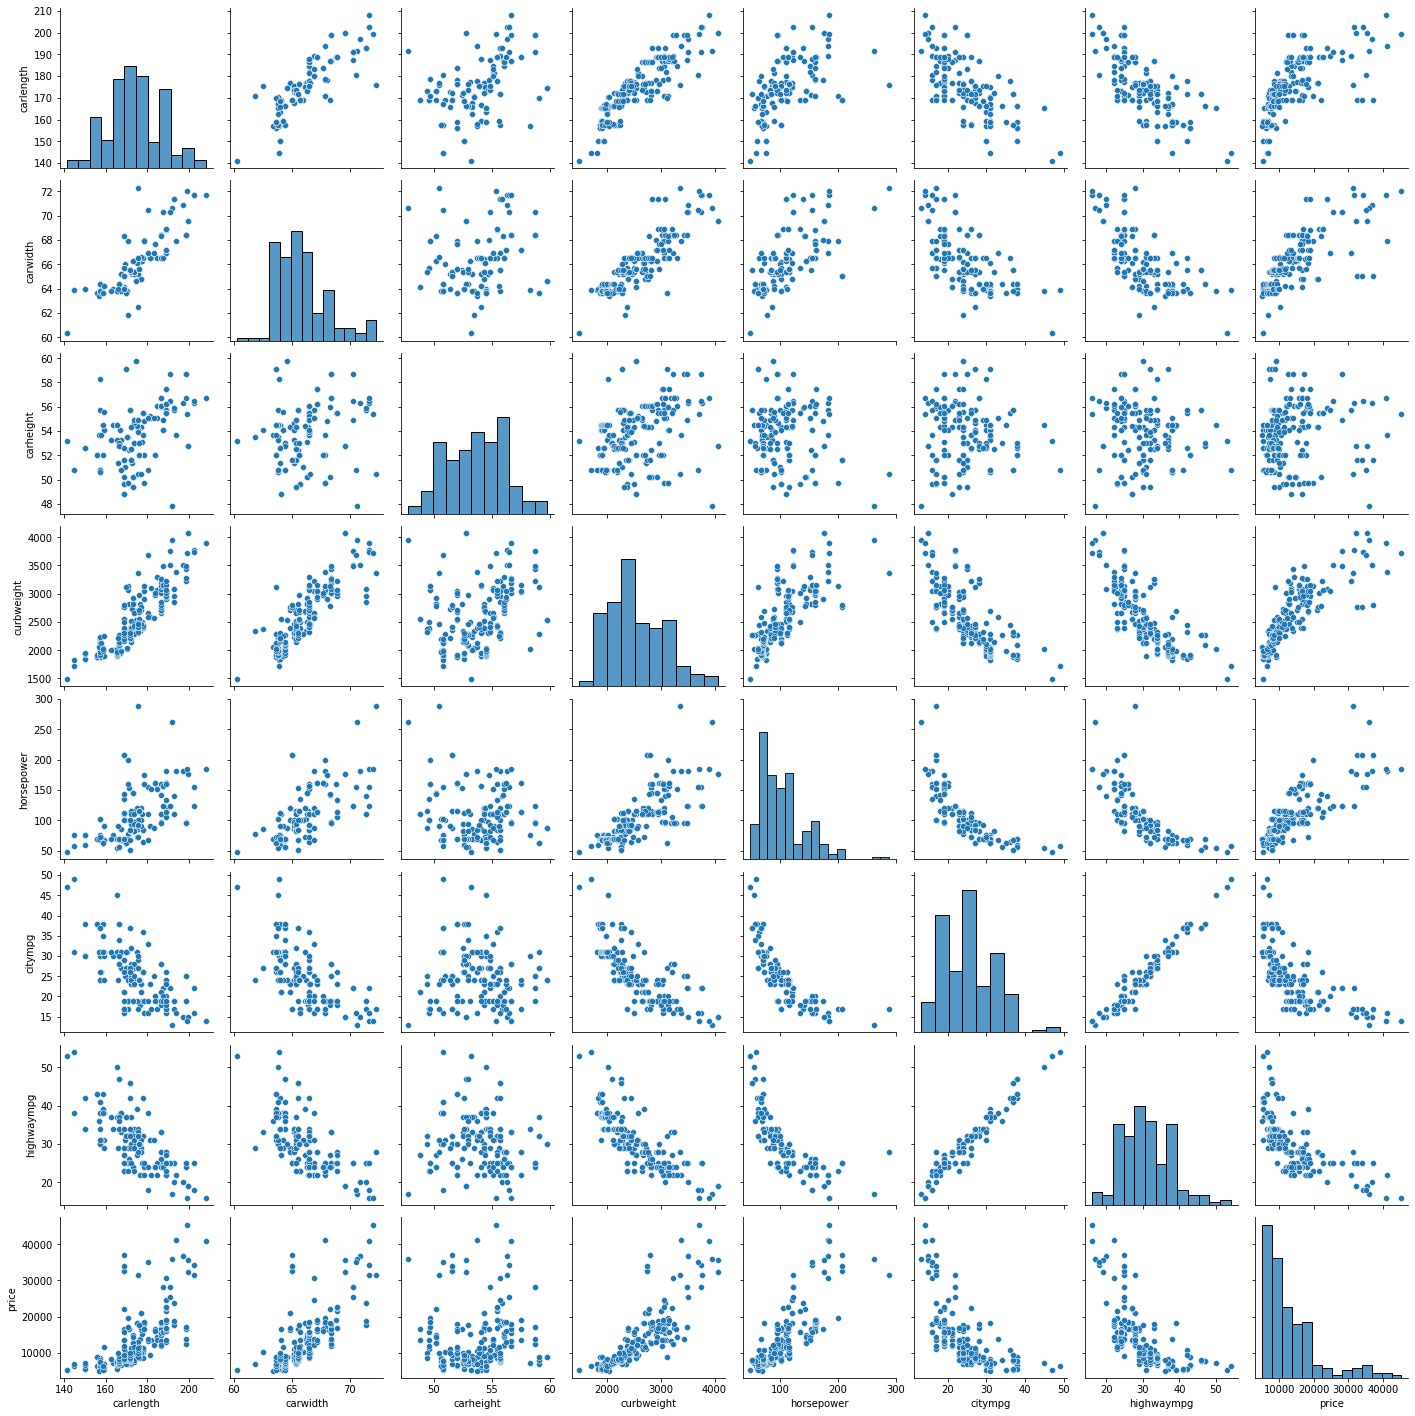

In [19]:
# Create a pair plot for the numerical features in the data set
sns.pairplot(df);

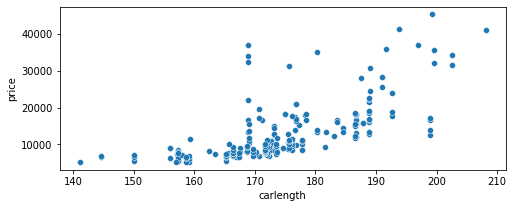

In [20]:
# Create a scatter plot of 'price' versus 'carlength'
plt.figure(figsize = (8, 3))
sns.scatterplot(data = df, x = 'carlength', y = 'price');

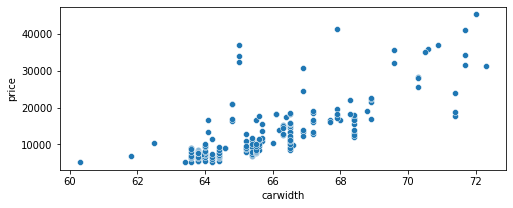

In [21]:
# Create a scatter plot of 'price' versus 'carwidth'
plt.figure(figsize = (8, 3))
sns.scatterplot(data = df, x = 'carwidth', y = 'price');

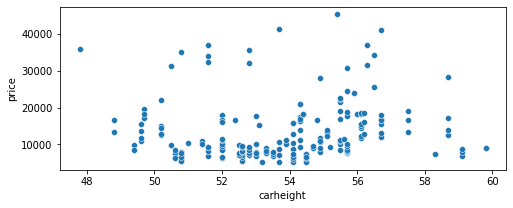

In [22]:
# Create a scatter plot of 'price' versus 'carheight'
plt.figure(figsize = (8, 3))
sns.scatterplot(data = df, x = 'carheight', y = 'price');

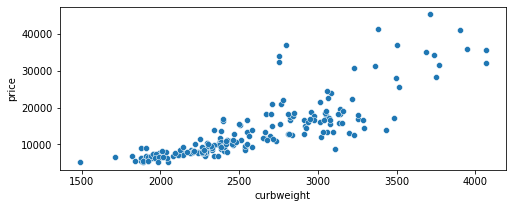

In [23]:
# Create a scatter plot of 'price' versus 'curbweight'
plt.figure(figsize = (8, 3))
sns.scatterplot(data = df, x = 'curbweight', y = 'price');

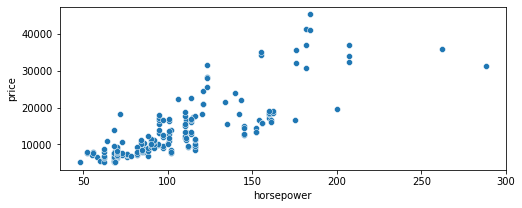

In [24]:
# Create a scatter plot of 'price' versus 'horsepower'
plt.figure(figsize = (8, 3))
sns.scatterplot(data = df, x = 'horsepower', y = 'price');

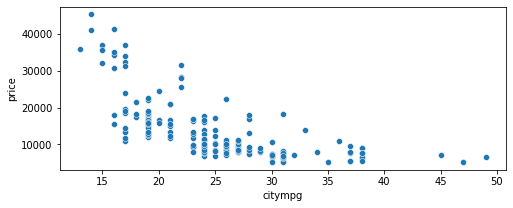

In [25]:
# Create a scatter plot of 'price' versus 'citympg'
plt.figure(figsize = (8, 3))
sns.scatterplot(data = df, x = 'citympg', y = 'price');

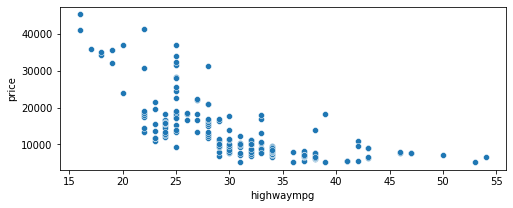

In [26]:
# Create a scatter plot of 'price' versus 'highwaympg'
plt.figure(figsize = (8, 3))
sns.scatterplot(data = df, x = 'highwaympg', y = 'price');

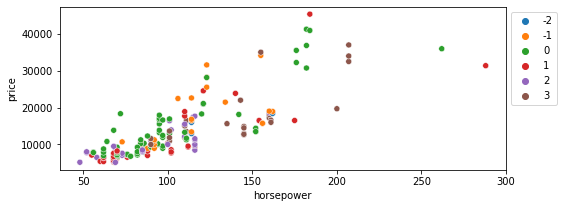

In [27]:
# Create a scatter plot of 'price' versus 'horsepower' colored by 'symboling'
plt.figure(figsize = (8, 3))
sns.scatterplot(data = df, x = 'horsepower', y = 'price', hue = 'symboling')
plt.legend(loc = 'best', bbox_to_anchor = (1, 1));

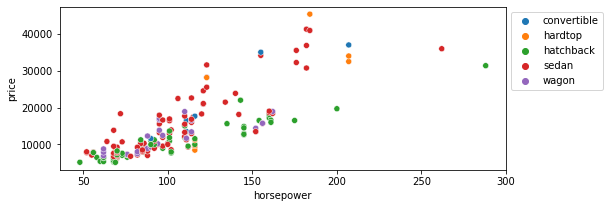

In [28]:
# Create a scatter plot of 'price' versus 'horsepower' colored by 'carbody'
plt.figure(figsize = (8, 3))
sns.scatterplot(data = df, x = 'horsepower', y = 'price', hue = 'carbody')
plt.legend(loc = 'best', bbox_to_anchor = (1, 1));

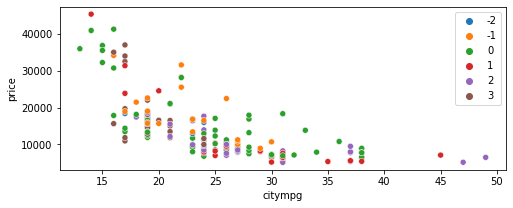

In [29]:
# Create a scatter plot of 'price' versus 'citympg' colored by 'symboling'
plt.figure(figsize = (8, 3))
sns.scatterplot(data = df, x = 'citympg', y = 'price', hue = 'symboling')
plt.legend(loc = 'best', bbox_to_anchor = (1, 1));

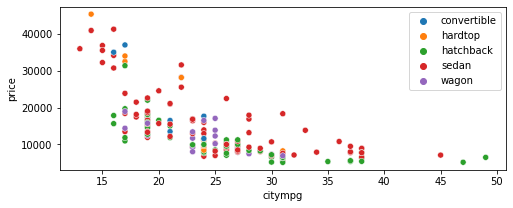

In [30]:
# Create a scatter plot of 'price' versus 'citympg' colored by 'carbody'
plt.figure(figsize = (8, 3))
sns.scatterplot(data = df, x = 'citympg', y = 'price', hue = 'carbody')
plt.legend(loc = 'best', bbox_to_anchor = (1, 1));

## EDA: Pivot Tables

In [31]:
# Create a pivot table of count of 'price' with respect to 'symboling' and 'carbody'
pd.pivot_table(data = df, values = 'price', index = 'symboling', columns = 'carbody', aggfunc = 'count', margins = True)

carbody,convertible,hardtop,hatchback,sedan,wagon,All
symboling,,,,,,
-2,0,0,0,3,0,3
-1,0,0,2,13,7,22
0,0,1,8,43,15,67
1,0,1,27,23,3,54
2,1,4,13,14,0,32
3,5,2,20,0,0,27
All,6,8,70,96,25,205


In [32]:
# Create a pivot table of mean 'price' with respect to 'symboling' and 'carbody'
pd.pivot_table(data = df, values = 'price', index = 'symboling', columns = 'carbody', aggfunc = 'mean', margins = True)

carbody,convertible,hardtop,hatchback,sedan,wagon,All
symboling,,,,,,
-2,NaN,NaN,NaN,15781.666667,NaN,15781.666667
-1,NaN,NaN,10618.000000,19178.384615,15817.142857,17330.681818
0,NaN,28176.0,9798.395875,16086.337209,10954.066667,14366.965179
1,NaN,45400.0,9000.388889,9537.760870,11422.666667,10037.907407
2,17669.0,9384.0,7614.384615,12093.214286,NaN,10109.281250
3,22734.8,33278.0,14237.250000,NaN,NaN,17221.296296
All,21890.5,22208.5,10376.652386,14344.270833,12371.960000,13276.710571


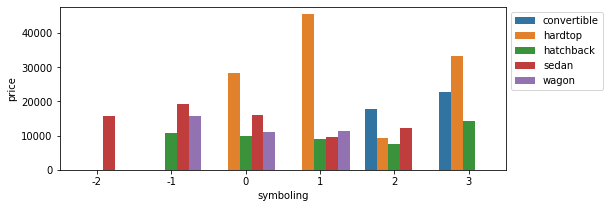

In [33]:
# Create a bar plot corresponding to the pivot table above
plt.figure(figsize = (8, 3))
sns.barplot(data = df, x = 'symboling', y = 'price', hue = 'carbody', ci = None)
plt.legend(loc = 'best', bbox_to_anchor = (1, 1));

# Part 3 - Simple Linear Regression Models
In this section, we will train and evaluate linear regression models for the data using *statsmodels*

### Model 1

In [34]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'carlength'
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_1 = smf.ols('price ~ carlength', data = df)
lr_model_1 = lr_model_1.fit() #model is being trained
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     177.4
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           1.68e-29
Time:                        10:26:37   Log-Likelihood:                -2068.1
No. Observations:                 205   AIC:                             4140.
Df Residuals:                     203   BIC:                             4147.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.369e+04   5792.793    -10.995      0.0

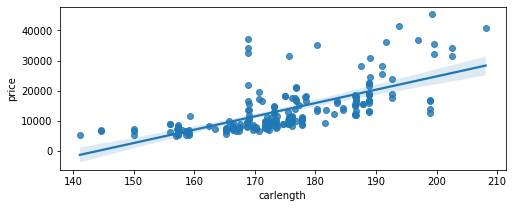

In [35]:
# Create a regression plot for this model
plt.figure(figsize = (8, 3))
sns.regplot(data = df, x = 'carlength', y = 'price');

In [36]:
# Look at the residual standard error for the model
print(np.round(np.sqrt(np.sum(lr_model_1.resid**2)/lr_model_1.df_resid), 2))

5850.16


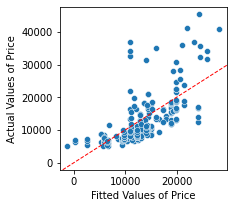

In [37]:
# Create a scatter plot between the fitted and actual values of 'price'
plt.figure(figsize = (3, 3))
sns.scatterplot(x = lr_model_1.fittedvalues, y = df['price'])
plt.axline((100,100), slope = 1, linestyle = '--', linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Actual Values of Price');

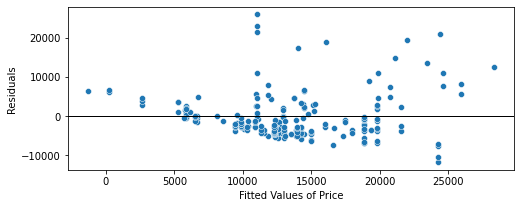

In [38]:
# Create a scatter plot between the fitted values of 'price' and the residuals
plt.figure(figsize = (8, 3))
sns.scatterplot(x = lr_model_1.fittedvalues, y = lr_model_1.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'k')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Residuals');

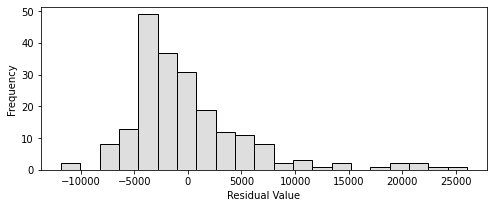

In [39]:
# Create a histogram of the residuals
plt.figure(figsize = (8, 3))
sns.histplot(data = df, x = lr_model_1.resid, color = 'lightgray')
plt.xlabel('Residual Value')
plt.ylabel('Frequency');

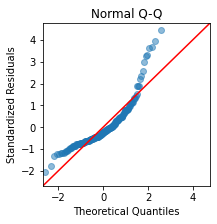

In [40]:
# Create a QQ plot for the data
QQ = ProbPlot(lr_model_1.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(3, 3)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predicted values
y_pred = lr_model_1.fittedvalues
# Actual values
y_true = df['price']

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)
# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
# Calculate RMSE
rmse = np.sqrt(mse)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')


RMSE: 5821.55
MAE: 4085.73
MSE: 33890454.83


### Model 2

In [44]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'carwidth'
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_2 = smf.ols('price ~ carwidth', data = df)
lr_model_2 = lr_model_2.fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     276.4
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           9.63e-40
Time:                        10:31:30   Log-Likelihood:                -2044.4
No. Observations:                 205   AIC:                             4093.
Df Residuals:                     203   BIC:                             4099.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.731e+05   1.12e+04    -15.433      0.0

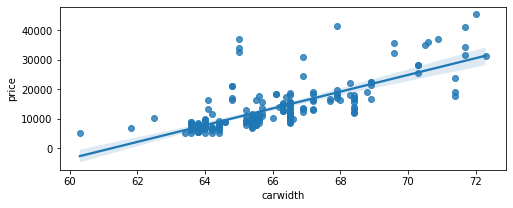

In [45]:
# Create a regression plot for this model
plt.figure(figsize = (8, 3))
sns.regplot(data = df, x = 'carwidth', y = 'price');

In [46]:
# Look at the residual standard error for the model
print(np.round(np.sqrt(np.sum(lr_model_2.resid**2)/lr_model_2.df_resid), 2))

5211.22


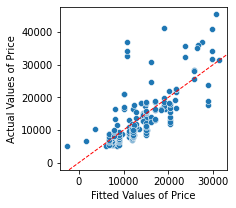

In [47]:
# Create a scatter plot between the fitted and actual values of 'price'
plt.figure(figsize = (3, 3))
sns.scatterplot(x = lr_model_2.fittedvalues, y = df['price'])
plt.axline((100,100), slope = 1, linestyle = '--', linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Actual Values of Price');

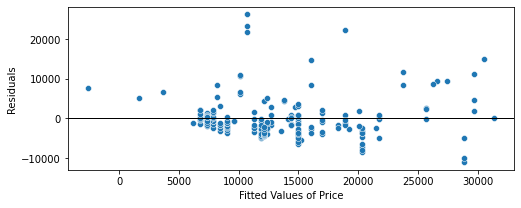

In [48]:
# Create a scatter plot between the fitted values of 'price' and the residuals
plt.figure(figsize = (8, 3))
sns.scatterplot(x = lr_model_2.fittedvalues, y = lr_model_2.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'k')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Residuals');

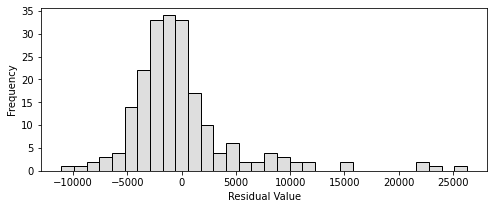

In [49]:
# Create a histogram of the residuals
plt.figure(figsize = (8, 3))
sns.histplot(data = df, x = lr_model_2.resid, color = 'lightgray')
plt.xlabel('Residual Value')
plt.ylabel('Frequency');

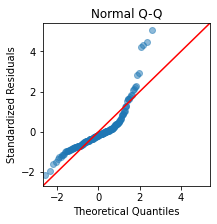

In [50]:
# Create a QQ plot for the data
QQ = ProbPlot(lr_model_2.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(3, 3)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');

### Model 3

In [52]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'carheight'
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_3 = smf.ols('price ~ carheight', data = df)
lr_model_3 = lr_model_3.fit()
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.933
Date:                Sun, 24 Mar 2024   Prob (F-statistic):             0.0883
Time:                        10:32:42   Log-Likelihood:                -2131.0
No. Observations:                 205   AIC:                             4266.
Df Residuals:                     203   BIC:                             4273.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7684.4770   1.23e+04     -0.627      0.5

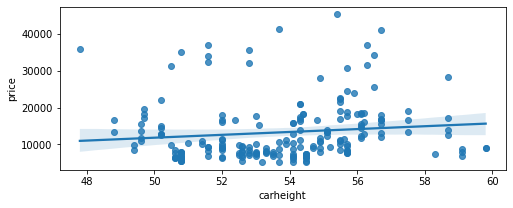

In [53]:
# Create a regression plot for this model
plt.figure(figsize = (8, 3))
sns.regplot(data = df, x = 'carheight', y = 'price');

In [54]:
# Look at the residual standard error for the model
print(np.round(np.sqrt(np.sum(lr_model_3.resid**2)/lr_model_3.df_resid), 2))

7951.28


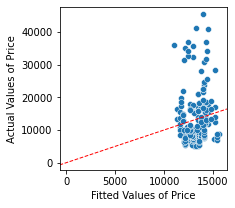

In [55]:
# Create a scatter plot between the fitted and actual values of 'price'
plt.figure(figsize = (3, 3))
sns.scatterplot(x = lr_model_3.fittedvalues, y = df['price'])
plt.axline((100,100), slope = 1, linestyle = '--', linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Actual Values of Price');

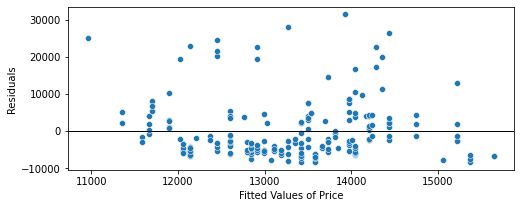

In [56]:
# Create a scatter plot between the fitted values of 'price' and the residuals
plt.figure(figsize = (8, 3))
sns.scatterplot(x = lr_model_3.fittedvalues, y = lr_model_3.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'k')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Residuals');

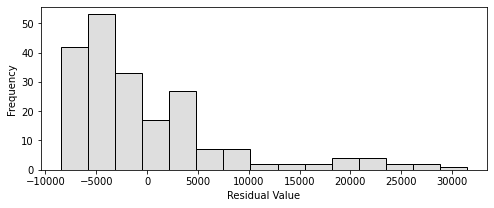

In [57]:
# Create a histogram of the residuals
plt.figure(figsize = (8, 3))
sns.histplot(data = df, x = lr_model_3.resid, color = 'lightgray')
plt.xlabel('Residual Value')
plt.ylabel('Frequency');

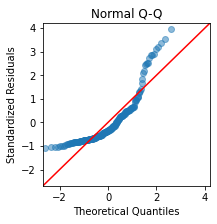

In [58]:
# Create a QQ plot for the data
QQ = ProbPlot(lr_model_3.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(3, 3)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');

### Model 4

In [59]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'curbweight'
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_4 = smf.ols('price ~ curbweight', data = df)
lr_model_4 = lr_model_4.fit()
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     468.6
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           1.21e-54
Time:                        10:32:48   Log-Likelihood:                -2009.8
No. Observations:                 205   AIC:                             4024.
Df Residuals:                     203   BIC:                             4030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.948e+04   1543.962    -12.614      0.0

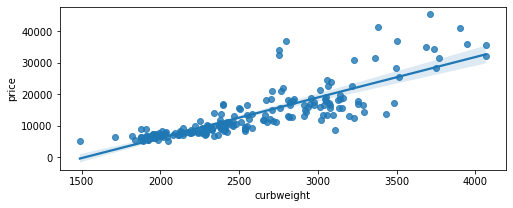

In [60]:
# Create a regression plot for this model
plt.figure(figsize = (8, 3))
sns.regplot(data = df, x = 'curbweight', y = 'price');

In [61]:
# Look at the residual standard error for the model
print(np.round(np.sqrt(np.sum(lr_model_4.resid**2)/lr_model_4.df_resid), 2))

4402.97


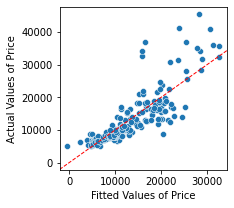

In [62]:
# Create a scatter plot between the fitted and actual values of 'price'
plt.figure(figsize = (3, 3))
sns.scatterplot(x = lr_model_4.fittedvalues, y = df['price'])
plt.axline((100,100), slope = 1, linestyle = '--', linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Actual Values of Price');

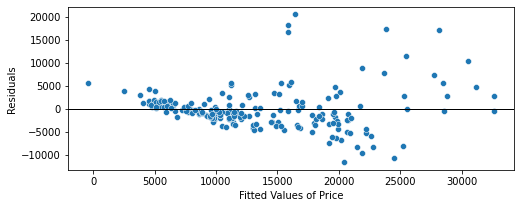

In [63]:
# Create a scatter plot between the fitted values of 'price' and the residuals
plt.figure(figsize = (8, 3))
sns.scatterplot(x = lr_model_4.fittedvalues, y = lr_model_4.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'k')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Residuals');

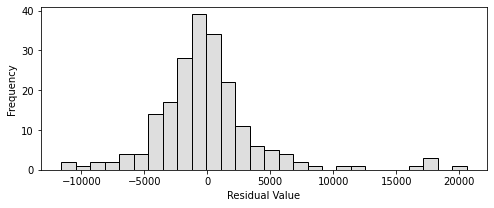

In [64]:
# Create a histogram of the residuals
plt.figure(figsize = (8, 3))
sns.histplot(data = df, x = lr_model_4.resid, color = 'lightgray')
plt.xlabel('Residual Value')
plt.ylabel('Frequency');

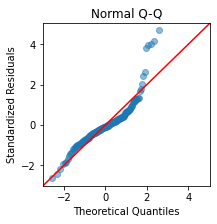

In [65]:
# Create a QQ plot for the data
QQ = ProbPlot(lr_model_4.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(3, 3)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');

### Model 5

In [ ]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'horsepower'
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_5 = smf.ols('price ~ horsepower', data = df)
lr_model_5 = lr_model_5.fit()
print(lr_model_5.summary())

In [ ]:
# Create a regression plot for this model
plt.figure(figsize = (8, 3))
sns.regplot(data = df, x = 'horsepower', y = 'price');

In [ ]:
# Look at the residual standard error for the model
print(np.round(np.sqrt(np.sum(lr_model_5.resid**2)/lr_model_5.df_resid), 2))

In [ ]:
# Create a scatter plot between the fitted and actual values of 'price'
plt.figure(figsize = (3, 3))
sns.scatterplot(x = lr_model_5.fittedvalues, y = df['price'])
plt.axline((100,100), slope = 1, linestyle = '--', linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Actual Values of Price');

In [ ]:
# Create a scatter plot between the fitted values of 'price' and the residuals
plt.figure(figsize = (8, 3))
sns.scatterplot(x = lr_model_5.fittedvalues, y = lr_model_5.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'k')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Residuals');

In [ ]:
# Create a histogram of the residuals
plt.figure(figsize = (8, 3))
sns.histplot(data = df, x = lr_model_5.resid, color = 'lightgray')
plt.xlabel('Residual Value')
plt.ylabel('Frequency');

In [ ]:
# Create a QQ plot for the data
QQ = ProbPlot(lr_model_5.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(3, 3)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');

### Model 6

In [ ]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'citympg'
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_6 = smf.ols('price ~ citympg', data = df)
lr_model_6 = lr_model_6.fit()
print(lr_model_6.summary())

In [ ]:
# Create a regression plot for this model
plt.figure(figsize = (8, 3))
sns.regplot(data = df, x = 'citympg', y = 'price');

In [ ]:
# Look at the residual standard error for the model
print(np.round(np.sqrt(np.sum(lr_model_6.resid**2)/lr_model_6.df_resid), 2))

In [ ]:
# Create a scatter plot between the fitted and actual values of 'price'
plt.figure(figsize = (3, 3))
sns.scatterplot(x = lr_model_6.fittedvalues, y = df['price'])
plt.axline((100,100), slope = 1, linestyle = '--', linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Actual Values of Price');

In [ ]:
# Create a scatter plot between the fitted values of 'price' and the residuals
plt.figure(figsize = (8, 3))
sns.scatterplot(x = lr_model_6.fittedvalues, y = lr_model_6.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'k')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Residuals');

In [ ]:
# Create a histogram of the residuals
plt.figure(figsize = (8, 3))
sns.histplot(data = df, x = lr_model_6.resid, color = 'lightgray')
plt.xlabel('Residual Value')
plt.ylabel('Frequency');

In [ ]:
# Create a QQ plot for the data
QQ = ProbPlot(lr_model_6.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(3, 3)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');

### Model 7

In [ ]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using 'highwaympg'
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_7 = smf.ols('price ~ highwaympg', data = df)
lr_model_7 = lr_model_7.fit()
print(lr_model_7.summary())

In [ ]:
# Create a regression plot for this model
plt.figure(figsize = (8, 3))
sns.regplot(data = df, x = 'highwaympg', y = 'price');

In [ ]:
# Look at the residual standard error for the model
print(np.round(np.sqrt(np.sum(lr_model_7.resid**2)/lr_model_7.df_resid), 2))

In [ ]:
# Create a scatter plot between the fitted and actual values of 'price'
plt.figure(figsize = (3, 3))
sns.scatterplot(x = lr_model_7.fittedvalues, y = df['price'])
plt.axline((100,100), slope = 1, linestyle = '--', linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Actual Values of Price');

In [ ]:
# Create a scatter plot between the fitted values of 'price' and the residuals
plt.figure(figsize = (8, 3))
sns.scatterplot(x = lr_model_7.fittedvalues, y = lr_model_7.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'k')
plt.xlabel('Fitted Values of Price')
plt.ylabel('Residuals');

In [ ]:
# Create a histogram of the residuals
plt.figure(figsize = (8, 3))
sns.histplot(data = df, x = lr_model_7.resid, color = 'lightgray')
plt.xlabel('Residual Value')
plt.ylabel('Frequency');

In [ ]:
# Create a QQ plot for the data
QQ = ProbPlot(lr_model_7.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(3, 3)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');